In [54]:
include("backend.jl")
using Plots
using LaTeXStrings
using ProgressBars
using CurveFit

In [2]:
Threads.nthreads()

8

## Task a

- varying s

In [16]:
function calculateResults()
    s_list = [0.1, 1.0, 10.0]
    
    stds = []
    avEs = []
    
    for (i,s) in collect(enumerate(s_list))
        avE, stdE = runSimulation(M=300,N=30000,n=1000,n_eq=0,s=s,α=0.15,β=0.5,κ=2.0)
        push!(stds, stdE)
        push!(avEs, avE)
    end

    return avEs, stds
end


calculateResults (generic function with 1 method)

In [18]:
@time avEs, stds = calculateResults()
display(stds[1][end])
display(stds[2][end])
display(stds[3][end])

 15.134603 seconds (351.81 M allocations: 25.509 GiB, 12.52% gc time)


0.013032000480859606

0.0026228863780547096

0.01045288963399214

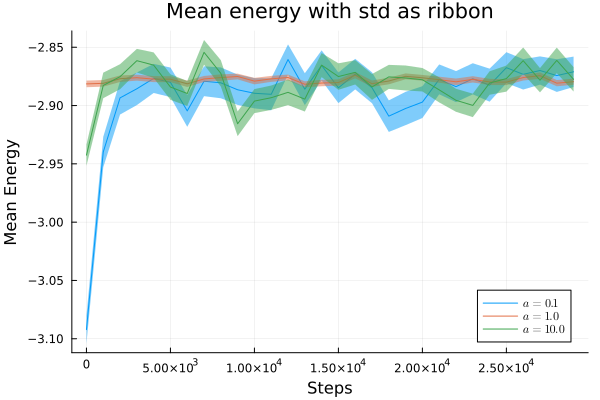

In [34]:
p = plot(1:1000:30000,avEs[1], ribbon=stds[1], label=L"a=0.1")
plot!(1:1000:30000,avEs[2], ribbon=stds[2], label=L"a=1.0")
plot!(1:1000:30000,avEs[3], ribbon=stds[3], label=L"a=10.0")
xlabel!("Steps")
ylabel!("Mean Energy")
title!("Mean energy with std as ribbon")

savefig(p, "saves/task1a.pdf")
display(p)


## Task 1b

- set $a=1.0$
- find n for equilibriation by varying $\alpha$

In [42]:
function calculateResults()
    αs = [0., 0.1, 0.2, 0.3, 0.4, 0.5]
    
    stds = []
    avEs = []
    
    for (i,α) in collect(enumerate(αs))
        avE, stdE = runSimulation(M=300,N=10000,n=1000,n_eq=0,s=0.1,α=α,β=0.5,κ=2.0)
        push!(stds, stdE)
        push!(avEs, avE)
    end

    return avEs, stds
end

calculateResults (generic function with 1 method)

In [43]:
@time avEs, stds = calculateResults();

 10.061906 seconds (234.55 M allocations: 17.068 GiB, 12.88% gc time)


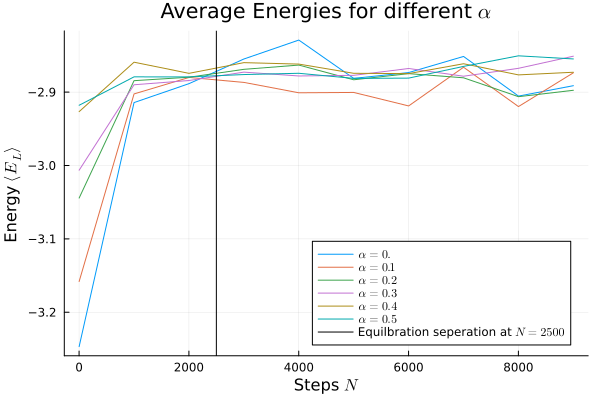

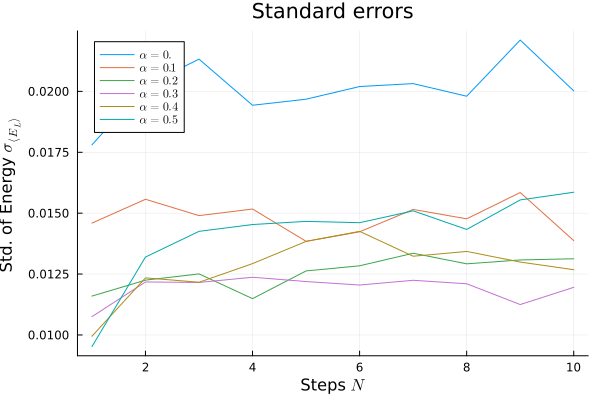

In [51]:

labels = [L"\alpha = 0." L"\alpha = 0.1" L"\alpha = 0.2" L"\alpha = 0.3" L"\alpha = 0.4" L"\alpha = 0.5"]

p1 = plot(1:1000:10000, avEs[1], label=labels[1], title=L"Average Energies for different $α$")
for i in 2:length(avEs)
    p1 = plot!(1:1000:10000, avEs[i], label=labels[i],)
end
vline!([2500], color="black", label=L"Equilbration seperation at $N=2500$")
xlabel!(L"Steps $N$")
ylabel!(L"Energy $⟨E_L⟩$")

p2 = plot(1:10, stds, labels=labels, title="Standard errors")
xlabel!(L"Steps $N$")
ylabel!(L"Std. of Energy $σ_{⟨E_L⟩}$")

savefig(p1, "saves/task1b.avEnergies.pdf")
savefig(p2, "saves/task1b.avStd.pdf")
display(p1)
display(p2)

## Task 1c

- set equilibrium n
- find optimal $\alpha$

In [62]:
function calculateResults(αs)

    avEnergies = zeros(length(αs))
    stdEnergies = zeros(length(αs))

    Threads.@threads for (i,α) in collect(enumerate(αs))
        res1, res2 = runSimulation(M=300,N=10000,n=7500,n_eq=2500,s=0.1,α=α,β=0.5,κ=2.0)
        avEnergies[i] = res1[1]
        stdEnergies[i] = res2[1]
    end

    return avEnergies, stdEnergies
end


calculateResults (generic function with 2 methods)

In [63]:
αs = 0:0.005:0.5
@time avEnergies, stdEnergies = calculateResults(αs);


 41.663678 seconds (3.42 G allocations: 247.185 GiB, 44.83% gc time, 0.08% compilation time)


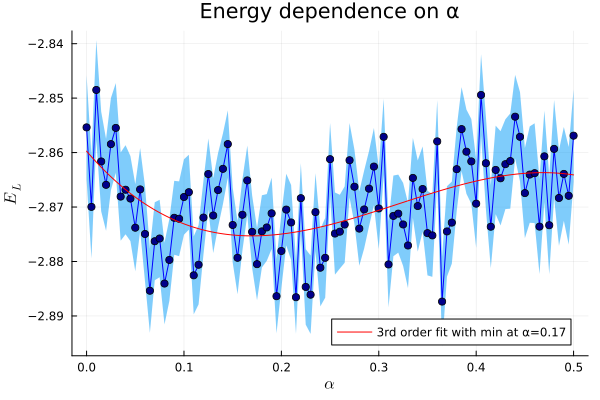

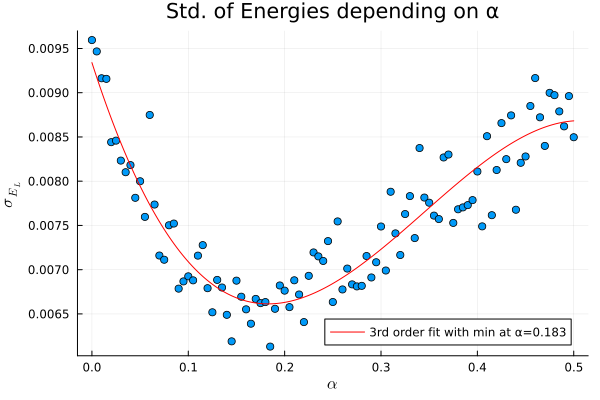

In [80]:
fit = curve_fit(Polynomial, αs, avEnergies, 3)

fitα = 0:0.001:0.5
yb = fit.(fitα)


p1 = plot(αs, avEnergies, ribbon=stdEnergies, lc="blue", label="")
scatter!(αs, avEnergies, label="", mc="darkblue")
plot!(fitα,yb, color="red", label="3rd order fit with min at α=$(fitα[findmin(yb)[2]])")
title!("Energy dependence on α")
xlabel!(L"α")
ylabel!(L"E_L")


fitstds = curve_fit(Polynomial, αs, stdEnergies, 3)
ybstds = fitstds.(fitα)

p2 = scatter(αs, stdEnergies, title="Std. of Energies depending on α", xlabel=L"α", ylabel=L"σ_{E_L}", label="")
plot!(fitα,ybstds, color="red", label="3rd order fit with min at α=$(fitα[findmin(ybstds)[2]])")

savefig(p1, "saves/task1c.avEnergies.pdf")
savefig(p2, "saves/task1c.avStd.pdf")
display(p1)
display(p2)

## Task 1d

- fixing $\alpha=0.18$
- finding $\kappa$

In [83]:
function calculateResults(κs)

    avEnergies = zeros(length(κs))
    stdEnergies = zeros(length(κs))

    Threads.@threads for (i,κ) in collect(enumerate(κs))
        res1, res2 = runSimulation(M=300,N=10000,n=7500,n_eq=2500,s=0.1,α=0.18,β=0.5,κ=κ)
        avEnergies[i] = res1[1]
        stdEnergies[i] = res2[1]
    end

    return avEnergies, stdEnergies
end

calculateResults (generic function with 2 methods)

In [89]:
κs = 1.7:0.005:2.2
@time avEnergies, stdEnergies = calculateResults(κs);

 40.522142 seconds (3.42 G allocations: 247.185 GiB, 44.13% gc time)


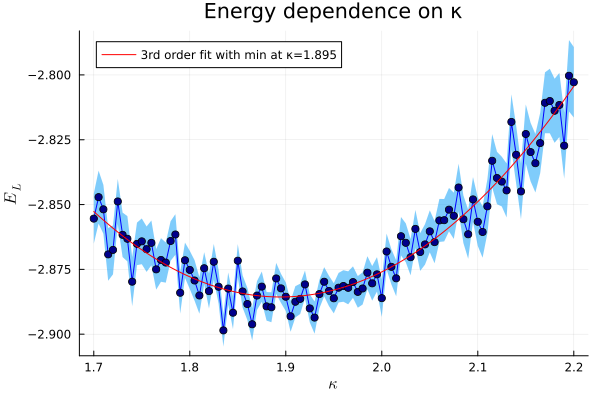

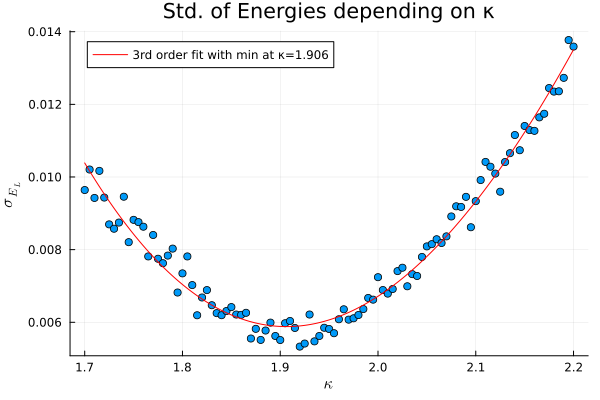

In [91]:
fit = curve_fit(Polynomial, κs, avEnergies, 2)

fitκs =1.7:0.001:2.2
yb = fit.(fitκs)

p1 = plot(κs, avEnergies, ribbon=stdEnergies, lc="blue", title="Energy dependence on κ", xlabel=L"κ", ylabel=L"E_L", label="")
scatter!(κs, avEnergies, label="", mc="darkblue")
plot!(fitκs,yb, color="red", label="3rd order fit with min at κ=$(fitκs[findmin(yb)[2]])")



fitstds = curve_fit(Polynomial, κs, stdEnergies, 3)
ybstds = fitstds.(fitκs)

p2 = scatter(κs, stdEnergies, title="Std. of Energies depending on κ", xlabel=L"κ", ylabel=L"σ_{E_L}", label="")
plot!(fitκs,ybstds, color="red", label="3rd order fit with min at κ=$(fitκs[findmin(ybstds)[2]])")


savefig(p1, "saves/task1d.avEnergies.pdf")
savefig(p2, "saves/task1d.avStd.pdf")
display(p1)
display(p2)


## task 1e 

- compare optimal $\alpha=0.18$, $\beta=0.38$ and $\kappa=1.85$ to experimental value

In [98]:
res = runSimulation(M=300,N=10000,n=7500,n_eq=2500,s=0.1,α=0.18,β=0.38,κ=1.85)

([-2.894501744381937], [0.0050367960539498])